## Soru 1:
* Kaggle'in 2020 yılı için üyeleriyle yaptığı anket sonuçlarını içeren ekteki "kaggle_survey_2020_responses.csv" dosyasını 2. satırı atlayarak ```survey``` adlı DataFrame'e okuyun.
* İlk sütunu silin.
* Q1, Q2, Q3, Q4, Q5 ve Q6 sütun isimlerini sırasıyla Age, Gender, Country, Education, Occupation ve Coding Experience olacak şekilde değiştirin.
* Education, Occupation ve Coding Experience sütunlarından herhangi birisisinde ```NaN``` değeri olan satırları siliniz. Kaç satır silindi?
* En son oluşan DataFrame'in satır ve sütun sayısını yazdırın.

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
survey = pd.read_csv("/content/kaggle_survey_2020_responses.csv", skiprows=[1])

In [ ]:
survey.drop(columns=survey.columns[0], axis=1, inplace=True)

In [ ]:
cols =  ['Age', 'Gender', 'Country', 'Education', 'Occupation', 'CodingExperience']
survey.columns = cols + survey.columns.tolist()[len(cols):]
survey.head()

,Age,Gender,Country,Education,Occupation,CodingExperience,Q7_Part_1,Q7_Part_2,Q7_Part_3,Q7_Part_4,Q7_Part_5,Q7_Part_6,Q7_Part_7,Q7_Part_8,Q7_Part_9,Q7_Part_10,Q7_Part_11,Q7_Part_12,Q7_OTHER,Q8,Q9_Part_1,Q9_Part_2,Q9_Part_3,Q9_Part_4,Q9_Part_5,Q9_Part_6,Q9_Part_7,Q9_Part_8,Q9_Part_9,Q9_Part_10,Q9_Part_11,Q9_OTHER,Q10_Part_1,Q10_Part_2,Q10_Part_3,Q10_Part_4,Q10_Part_5,Q10_Part_6,Q10_Part_7,Q10_Part_8,...,Q31_B_Part_7,Q31_B_Part_8,Q31_B_Part_9,Q31_B_Part_10,Q31_B_Part_11,Q31_B_Part_12,Q31_B_Part_13,Q31_B_Part_14,Q31_B_OTHER,Q33_B_Part_1,Q33_B_Part_2,Q33_B_Part_3,Q33_B_Part_4,Q33_B_Part_5,Q33_B_Part_6,Q33_B_Part_7,Q33_B_OTHER,Q34_B_Part_1,Q34_B_Part_2,Q34_B_Part_3,Q34_B_Part_4,Q34_B_Part_5,Q34_B_Part_6,Q34_B_Part_7,Q34_B_Part_8,Q34_B_Part_9,Q34_B_Part_10,Q34_B_Part_11,Q34_B_OTHER,Q35_B_Part_1,Q35_B_Part_2,Q35_B_Part_3,Q35_B_Part_4,Q35_B_Part_5,Q35_B_Part_6,Q35_B_Part_7,Q35_B_Part_8,Q35_B_Part_9,Q35_B_Part_10,Q35_B_OTHER
0,35-39,Man,Colombia,Doctoral degree,Student,5-10 years,Python,R,SQL,C,NaN,NaN,Javascript,NaN,NaN,NaN,MATLAB,NaN,Other,Python,"Jupyter (JupyterLab, Jupyter Notebooks, etc)",NaN,NaN,Visual Studio Code (VSCode),NaN,Spyder,NaN,NaN,NaN,NaN,NaN,NaN,Kaggle Notebooks,Colab Notebooks,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,SAP Analytics Cloud,NaN,NaN,"Automated data augmentation (e.g. imgaug, albu...",NaN,NaN,NaN,Automated hyperparameter tuning (e.g. hyperopt...,Automation of full ML pipelines (e.g. Google C...,NaN,NaN,Google Cloud AutoML,NaN,Databricks AutoML,NaN,NaN,Auto-Keras,Auto-Sklearn,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,TensorBoard,NaN,NaN,NaN,NaN,NaN,NaN
1,30-34,Man,United States of America,Master’s degree,Data Engineer,5-10 years,Python,R,SQL,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Python,NaN,NaN,Visual Studio,NaN,PyCharm,NaN,NaN,Sublime Text,NaN,NaN,NaN,NaN,NaN,Colab Notebooks,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,35-39,Man,Argentina,Bachelor’s degree,Software Engineer,10-20 years,NaN,NaN,NaN,NaN,NaN,Java,Javascript,NaN,NaN,Bash,NaN,NaN,NaN,R,NaN,NaN,NaN,Visual Studio Code (VSCode),NaN,NaN,Notepad++,Sublime Text,Vim / Emacs,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,None,NaN,NaN,NaN,NaN,NaN,NaN,NaN,None,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,None,NaN
3,30-34,Man,United States of America,Master’s degree,Data Scientist,5-10 years,Python,NaN,SQL,NaN,NaN,NaN,NaN,NaN,NaN,Bash,NaN,NaN,NaN,Python,NaN,NaN,NaN,NaN,PyCharm,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,30-34,Man,Japan,Master’s degree,Software Engineer,3-5 years,Python,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Python,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [ ]:
nullValues = str(survey.iloc[:, 3:6].isna().sum()[2])
print("Number of rows to be deleted: ", nullValues)
print("Shape before dropping NaN values: ", survey.shape)

Number of rows to be deleted:  916
Shape before dropping NaN values:  (20036, 354)


In [ ]:
survey.dropna(subset=['Education', 'Occupation', 'CodingExperience'], how = 'any', inplace = True)

In [ ]:
print("Shape after dropping NaN values: ", survey.shape)

Shape after dropping NaN values:  (19120, 354)


## Soru 2:
Ankete katılanların yaş aralık dağılımını pasta grafiği ile gösteriniz.

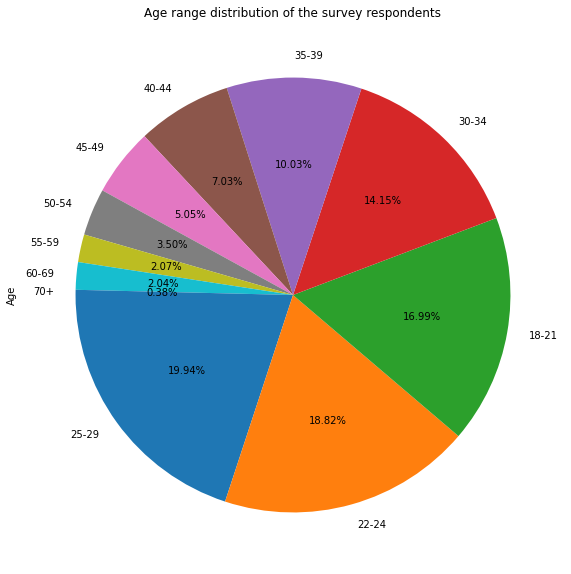

In [ ]:
count = survey['Age'].value_counts()
count.plot.pie(autopct='%.2f%%', startangle=180, figsize=(10,10), title='Age range distribution of the survey respondents')
plt.show()

## Soru 3:
Türkiye'den ankete katılanların eğitim seviyelerine göre sayılarını listeleyiniz.

In [ ]:
education = survey.groupby(['Country', 'Education']).size().sort_values(ascending=False)
educationTurkey = education.loc['Turkey']
print(educationTurkey)

Education
Bachelor’s degree                                                    129
Master’s degree                                                      111
Doctoral degree                                                       50
Some college/university study without earning a bachelor’s degree     15
I prefer not to answer                                                 8
Professional degree                                                    6
No formal education past high school                                   3
dtype: int64


## Soru 4:
Her bir yaş aralığı için en çok yapılan meslek ismini (```Occupation```) listeleyiniz.

In [ ]:
occupation = (survey.groupby('Age')['Occupation'].value_counts().unstack()).idxmax(axis = 1)
occupation

Age
18-21           Student
22-24           Student
25-29           Student
30-34    Data Scientist
35-39    Data Scientist
40-44    Data Scientist
45-49             Other
50-54             Other
55-59             Other
60-69             Other
70+      Data Scientist
dtype: object

## Soru 5:
* Her bir programlama dilinin kaç anket katılımcısı tarafından kullanıldığını bulup büyükten küçüğe sıralayınız.
* Her bir programlama dilinin kaç ```Data Scientist``` tarafından kullanıldığını bulup büyükten küçüğe sıralayınız. 
* Her iki sonucu aynı figürde yan yana iki alt grafik (subplot) olarak gösteriniz. Grafiklere uygun birer başlık (```title```) atayınız.

In [ ]:
plUserNum = survey.filter(regex='^Q7', axis=1).stack().value_counts()
plUserNum

Python        15530
SQL            7535
R              4277
C++            3827
Java           3367
C              3315
Javascript     2995
MATLAB         2217
Other          1945
Bash           1776
Julia           262
None            206
Swift           198
dtype: int64

In [ ]:
plDataScientistNum = survey[survey.Occupation == 'Data Scientist'].filter(regex='^Q7', axis=1).stack().value_counts()
plDataScientistNum

Python        2453
SQL           1473
R              975
Bash           405
C++            323
Java           305
Javascript     290
C              247
Other          245
MATLAB         242
Julia           71
Swift           14
None             5
dtype: int64

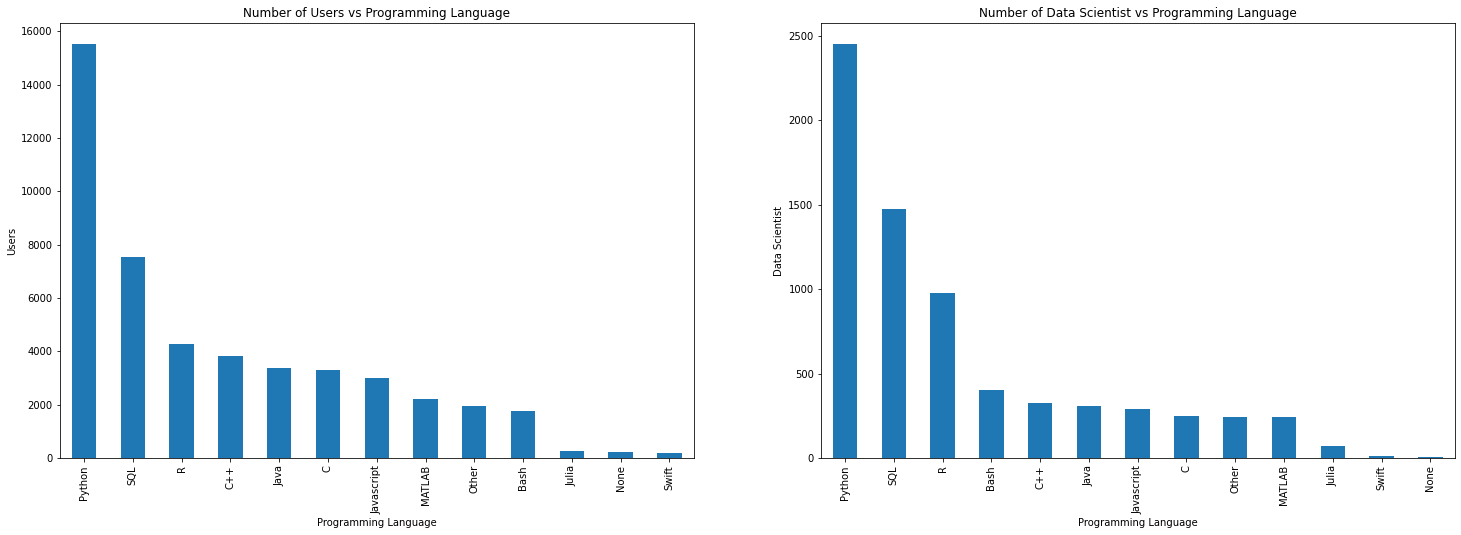

In [ ]:
fig, axes = plt.subplots(nrows=1, ncols=2,figsize=(25,8))

plUserNum.plot(ax=axes[0], kind='bar')
axes[0].set_title('Number of Users vs Programming Language')
axes[0].set_xlabel('Programming Language')
axes[0].set_ylabel('Users')
plDataScientistNum.plot(ax=axes[1], kind='bar')
axes[1].set_title('Number of Data Scientist vs Programming Language')
axes[1].set_xlabel('Programming Language')
axes[1].set_ylabel('Data Scientist')
plt.show()

## Soru 6:
Yatay eksende kodlama deneyimi, dikey eksende makine öğrenmesi metotlarını kullanan ```Data Scientist``` sayısı olacak şekilde bir sütun grafiği çiziniz.

In [ ]:
ds = survey[survey.Occupation == 'Data Scientist']

In [ ]:
codingExp = pd.concat([ds.CodingExperience, ds.filter(regex='^Q15', axis=1)], axis=1)
codingExp = codingExp[codingExp.Q15 != 'I do not use machine learning methods']

In [ ]:
rowNames = ['I have never written code','< 1 years', '1-2 years', '3-5 years', '5-10 years', '10-20 years', '20+ years']
codingExp = codingExp.groupby('CodingExperience', sort=False).count().reindex(index=rowNames)

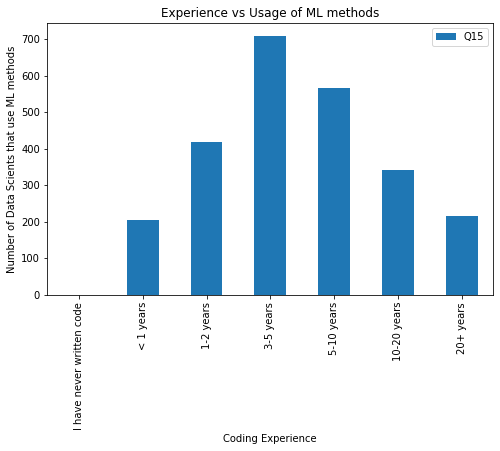

In [ ]:
codingExp.plot(kind='bar', figsize = (8,5), ylabel='Number of Data Scients that use ML methods', xlabel='Coding Experience', title='Experience vs Usage of ML methods')
plt.show()

In [ ]:
dsCodingExp = pd.concat([ds.CodingExperience, ds.filter(regex='^Q17', axis=1)], axis=1)
dsCodingExp.head()

,CodingExperience,Q17_Part_1,Q17_Part_2,Q17_Part_3,Q17_Part_4,Q17_Part_5,Q17_Part_6,Q17_Part_7,Q17_Part_8,Q17_Part_9,Q17_Part_10,Q17_Part_11,Q17_OTHER
3,5-10 years,Linear or Logistic Regression,Decision Trees or Random Forests,"Gradient Boosting Machines (xgboost, lightgbm,...",Bayesian Approaches,NaN,"Dense Neural Networks (MLPs, etc)",NaN,NaN,NaN,NaN,NaN,NaN
8,5-10 years,NaN,NaN,"Gradient Boosting Machines (xgboost, lightgbm,...",NaN,NaN,NaN,Convolutional Neural Networks,NaN,NaN,NaN,NaN,NaN
21,< 1 years,Linear or Logistic Regression,Decision Trees or Random Forests,NaN,NaN,NaN,"Dense Neural Networks (MLPs, etc)",NaN,NaN,NaN,NaN,NaN,NaN
37,3-5 years,Linear or Logistic Regression,Decision Trees or Random Forests,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
39,3-5 years,Linear or Logistic Regression,Decision Trees or Random Forests,"Gradient Boosting Machines (xgboost, lightgbm,...",Bayesian Approaches,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [ ]:
columns = ['Experience', 'Linear/Logistic Reg', 'Decision Trees/Random Forest', 'GBM', 'Bayesian','Evolutionary',
           'DNN', 'CNN', 'GAN', 'RNN', 'Transformer Networks', 'None', 'Other']
dsCodingExp.columns = columns
dsCodingExp = dsCodingExp.groupby('Experience', as_index=False).count()
dsCodingExp

,Experience,Linear/Logistic Reg,Decision Trees/Random Forest,GBM,Bayesian,Evolutionary,DNN,CNN,GAN,RNN,Transformer Networks,None,Other
0,1-2 years,335,313,214,115,20,109,179,32,115,51,11,8
1,10-20 years,289,276,234,121,35,104,151,28,106,56,1,20
2,20+ years,182,166,131,94,27,60,92,21,61,35,4,20
3,3-5 years,576,546,439,185,34,205,328,47,216,101,8,25
4,5-10 years,472,439,376,188,37,169,233,42,184,100,6,26
5,< 1 years,169,148,91,55,5,33,62,7,48,15,10,9
6,I have never written code,0,0,0,0,0,0,0,0,0,0,0,0


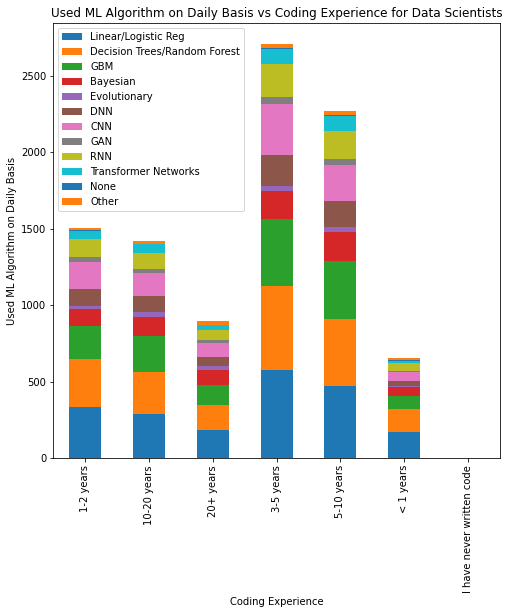

In [ ]:
index = columns
mlCodingExp= dsCodingExp.groupby(["Experience"])[columns].sum()

mlCodingExp.plot(kind="bar", stacked=True, figsize=(8,8))
plt.xlabel("Coding Experience")
plt.ylabel("Used ML Algorithm on Daily Basis")
plt.title("Used ML Algorithm on Daily Basis vs Coding Experience for Data Scientists")
plt.show()

## Soru 7:
* Yalnızca scikit-learn framework'ünü kullananların kullandıkları makine öğrenmesi algoritmalarının kullanıcı sayılarını büyükten küçüğe listeleyiniz.
* Scikit-learn, tensorflow ve keras kütüphanelerini düzenli olarak kullanan kişi sayısı kaçtır?

In [ ]:
#Only those using the scikit-learn framework
q16 = survey.filter(regex='^Q16', axis=1).dropna(subset=['Q16_Part_1'])
q16 = q16[q16.iloc[:, 1:].isnull().all(axis=1)]
q16

,Q16_Part_1,Q16_Part_2,Q16_Part_3,Q16_Part_4,Q16_Part_5,Q16_Part_6,Q16_Part_7,Q16_Part_8,Q16_Part_9,Q16_Part_10,Q16_Part_11,Q16_Part_12,Q16_Part_13,Q16_Part_14,Q16_Part_15,Q16_OTHER
24,Scikit-learn,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
27,Scikit-learn,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
73,Scikit-learn,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
110,Scikit-learn,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
119,Scikit-learn,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
20002,Scikit-learn,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
20003,Scikit-learn,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
20012,Scikit-learn,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
20014,Scikit-learn,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [ ]:
#Machine learning algorithms used only by those using the scikit-learn framework
mlAlgorithms = survey.filter(regex='^Q17', axis=1).loc[q16.index].stack().value_counts()
mlAlgorithms

Linear or Logistic Regression                          1683
Decision Trees or Random Forests                       1292
Bayesian Approaches                                     428
Gradient Boosting Machines (xgboost, lightgbm, etc)     295
Convolutional Neural Networks                           138
None                                                    105
Dense Neural Networks (MLPs, etc)                        68
Recurrent Neural Networks                                67
Other                                                    60
Evolutionary Approaches                                  38
Transformer Networks (BERT, gpt-3, etc)                  20
Generative Adversarial Networks                           8
dtype: int64

In [ ]:
#Number of people who regularly use scikit-learn, tensorflow and keras libraries
survey.filter(regex='^Q16', axis=1).iloc[:, :3].unstack().value_counts()

  Scikit-learn     10250
  TensorFlow        6934
 Keras              6192
dtype: int64

In [ ]:
q16 = survey.filter(regex='^Q16', axis=1)
q16 = q16[~q16.iloc[:, :3].isnull().any(axis=1)]
print('Number of people who regulary use scikit-learn, tensorflow and keras together:', q16.shape[0])

Number of people who regulary use scikit-learn, tensorflow and keras together: 4406


## Soru 8:
* Ortalama yıllık maaşı en yüksek olan meslek (```Occupation```) nedir? ```Data Scientist``` kaçıncı sıradadır? **Not:** Aralık olarak verilen maaşların orta noktasını maaş değeri olarak alıp ```ConvertedComp``` isimli yeni bir sütun ekleyiniz.
* ```Data Scientist``` olarak çalışanların ülke bazında ortalama yıllık maaşlarını büyükten küçüğe sıralayın, ilk 10 ülkeyi ve bu ülkelerdeki ortalama yıllık ```Data Scientist``` maaşlarını listeleyin.
* 250’den fazla kişi çalışan kurumdakilerin ortalama maaşları ne kadardır?
* Hesaplanan maaş (```ConvertedComp```) sütununu kullanarak ülke bazlı ortalama, standart sapma ve medyan değerlerinden oluşan bir dataframe oluşturun ve listeleyin. Türkiye kaçıncı sıradadır ve değeri kaçtır?

In [ ]:
#Adding a new column ConvertedComp
yearlyCompensation = pd.concat([survey.Occupation, survey.filter(regex='^Q24', axis=1)], axis=1)
survey['ConvertedComp'] = yearlyCompensation.Q24.str.split('-', expand=True).replace({'\$':'', '>':'', ',':''}, regex = True).astype(float).mean(axis=1)

In [ ]:
avgSalary =  survey.groupby('Occupation').agg({'ConvertedComp':'mean'}).sort_values('ConvertedComp', ascending=False).dropna()
avgSalary

,ConvertedComp
Occupation,
Product/Project Manager,62362.216949
Data Scientist,54477.821518
Data Engineer,50225.113821
Other,46755.972149
DBA/Database Engineer,45872.276786
Research Scientist,45399.797665
Business Analyst,39512.040560
Software Engineer,38562.467901
Machine Learning Engineer,37625.320806


In [ ]:
print("Occupation with the highest average annual salary: ", avgSalary.head(1).index[0])
print('According to the increasing data of the average annual salary, the data scientist is in the {}th place.'.format(avgSalary.index.get_loc('Data Scientist') + 1))

Occupation with the highest average annual salary:  Product/Project Manager
According to the increasing data of the average annual salary, the data scientist is in the 2th place.


In [ ]:
 #Ranking the average annual salaries by country from largest to smallest
 survey[survey['Occupation'] == 'Data Scientist'].groupby('Country').agg({'ConvertedComp':'mean'}).sort_values('ConvertedComp', ascending=False).dropna()[0:10].reset_index().rename(columns={'ConvertedComp':'Avg Salary'})

,Country,Avg Salary
0,United States of America,142609.330110
1,Israel,111979.520000
2,Switzerland,109230.269231
3,Australia,104318.958333
4,United Kingdom of Great Britain and Northern I...,89749.504587
5,Germany,79804.195312
6,Ireland,78499.500000
7,Singapore,76937.000000
8,Canada,74466.481132
9,Thailand,73707.875000


In [ ]:
 numOfEmployees = ['250-999 employees', '1000-9,999 employees', '10,000 or more employees']
 print("Average salary of an organization with more than 250 employee is: {:.2f}".format(survey.loc[survey.Q20.isin(numOfEmployees)].agg({'ConvertedComp':'mean'})[0]))

Average salary of an organization with more than 250 employee is: 56410.83


In [ ]:
country = survey.groupby('Country')
dfMean = country.agg({'ConvertedComp':'mean'}).sort_values('ConvertedComp', ascending=False).reset_index().rename(columns={'ConvertedComp': 'AvgSalary'})
dfMedian = country.agg({'ConvertedComp':'median'}).reset_index().rename(columns={'ConvertedComp': 'Median'})
dfSd = country.agg({'ConvertedComp': 'std'}).reset_index().rename(columns={'ConvertedComp': 'StandardDeviation'})
dfStatistics = pd.merge(dfMean, dfMedian).merge(dfSd)
dfStatistics.head(10)

,Country,AvgSalary,Median,StandardDeviation
0,United States of America,120321.619272,112499.5,85088.163171
1,Switzerland,120051.583333,112499.5,54795.290175
2,Israel,109757.328125,94999.5,101749.997198
3,Australia,87807.329932,84999.5,70029.059912
4,United Kingdom of Great Britain and Northern I...,82429.511429,64999.5,77980.660312
5,Germany,73634.271484,64999.5,64869.140664
6,Canada,73563.896465,74999.5,55076.938245
7,Netherlands,70603.482301,64999.5,38504.894831
8,United Arab Emirates,65777.277778,64999.5,57151.792062
9,Sweden,60767.681818,54999.5,33930.786528


In [ ]:
turkeyStat = dfStatistics[dfStatistics.Country == 'Turkey']
print("Turkey is in the {}th place.".format(turkeyStat.index[0] + 1))
print("Average salary in Turkey is: {:.2f}".format(turkeyStat.iloc[:, 1].values[0]))

Turkey is in the 40th place.
Average salary in Turkey is: 16692.27


## Soru 9:
Lisans, yüksek lisans ve doktora mezunlarına ilişkin (ayrı ayrı); yatay eksende kodlama deneyimi (artan sırada olmalıdır), dikey eksende ortalama maaş bilgisi olacak şekilde tek bir çizgi grafiği çiziniz.

In [ ]:
bachelor = survey[survey.Education == 'Bachelor’s degree'].groupby(['CodingExperience']).agg({'ConvertedComp':'mean'}).reindex(index=rowNames)
master = survey[survey.Education == 'Master’s degree'].groupby(['CodingExperience']).agg({'ConvertedComp':'mean'}).reindex(index=rowNames)
doctoral = survey[survey.Education == 'Doctoral degree'].groupby(['CodingExperience']).agg({'ConvertedComp':'mean'}).reindex(index=rowNames)

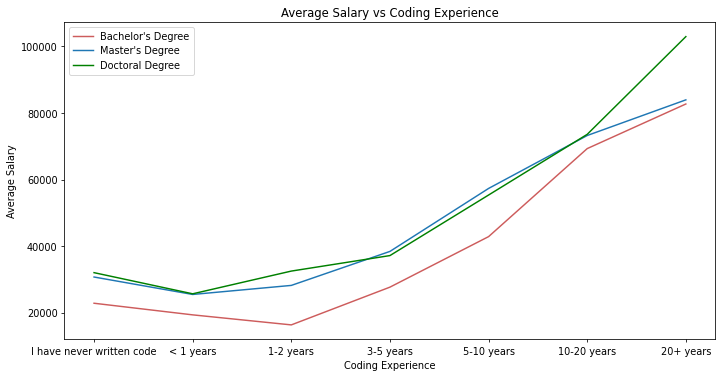

In [ ]:
plt.figure(figsize=(12, 6), dpi=70)

plt.plot(bachelor, color='indianred', label = "Bachelor's Degree")
plt.plot(master, label = "Master's Degree")
plt.plot(doctoral, color='green', label = "Doctoral Degree")
plt.xlabel('Coding Experience')
plt.ylabel('Average Salary')
plt.title('Average Salary vs Coding Experience')
plt.legend()
plt.show()

## Soru 10:
* Mesleklerdeki (```Occupation```) cinsiyet dağılımını, yatay yığılmış "stacked" sütun grafik olarak gösteriniz.
* Her meslek (```Occupation```) için kadın oranını bulup büyükten küçüğe sıralayınız.
* Şu anda çalışmayan kadın ve erkek oranlarını listeleyiniz.

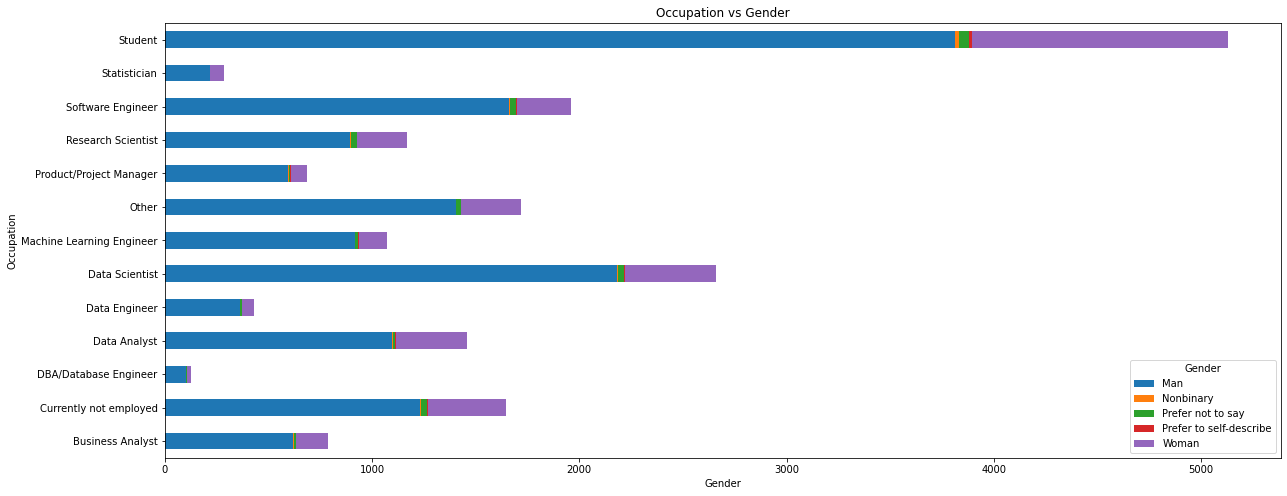

In [ ]:
survey.groupby(["Occupation"])["Gender"].value_counts().unstack().plot(kind="barh", stacked=True, figsize=(20,8))
plt.xlabel("Gender")
plt.ylabel("Occupation")
plt.title("Occupation vs Gender")
plt.show()

In [ ]:
survey[survey.Gender == 'Woman'].groupby('Occupation').size().rename('Percantage').transform(lambda x: x/x.sum()*100).sort_values(ascending=False)

Occupation
Student                      33.478261
Data Scientist               11.875000
Currently not employed       10.135870
Data Analyst                  9.320652
Other                         7.853261
Software Engineer             7.065217
Research Scientist            6.440217
Business Analyst              4.130435
Machine Learning Engineer     3.668478
Product/Project Manager       2.119565
Statistician                  1.847826
Data Engineer                 1.630435
DBA/Database Engineer         0.434783
Name: Percantage, dtype: float64

In [ ]:
maleWomanSurvey = survey[(survey.Gender == 'Man') | (survey.Gender == 'Woman')]
maleWomanSurvey[maleWomanSurvey.Occupation == 'Currently not employed'].groupby('Gender').size()*100/maleWomanSurvey.groupby('Gender').size()

Gender
Man       8.152858
Woman    10.135870
dtype: float64

## Soru 11:

Ankete katılan kadınlardan ortalama çalışma süresi 3 yılın üzerinde olanlar için:
* Kadın katılımcı sayısının en yüksek olduğu ülke hangisidir?
* Türkiye'den ankete katılan kadınların eğitim durumlarını pasta grafiğinde gösteriniz.

In [ ]:
experience = ['3-5 years', '5-10 years', '10-20 years', '20+ years']
print("The country with the highest number of female participants: ", survey[survey.Gender == 'Woman'].loc[survey.CodingExperience.isin(experience)].groupby('Country').size().sort_values(ascending=False).head(1).index[0])

The country with the highest number of female participants:  India


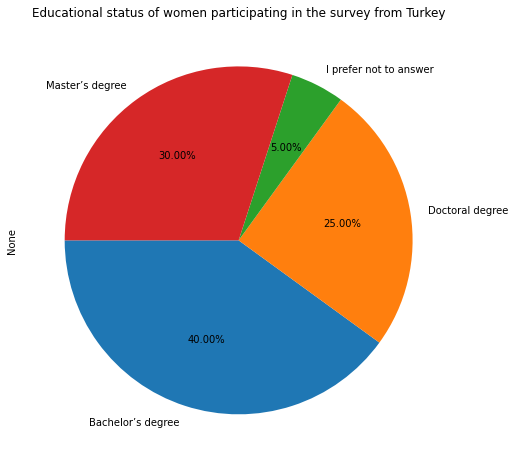

In [ ]:
count = survey[(survey.Country == 'Turkey') & (survey.Gender == 'Woman')].loc[survey.CodingExperience.isin(experience)].groupby('Education').size()
count.plot.pie(autopct='%.2f%%', startangle=180, figsize=(10,8), title='Educational status of women participating in the survey from Turkey')
plt.show()

## Soru 12:
* 39. soru ile ilgili sütunlarda yer alan değerlerdeki parantez içi ifadeleri siliniz.
* 18-21 yaş aralığında olan katılımcıların favori sosyal medya platformu nedir?

In [ ]:
#Deleting parenthetical expressions
columns_q39 = survey.filter(regex='^Q39', axis=1).columns.tolist()
survey.loc[:, columns_q39] = survey.loc[:, columns_q39].replace(regex="\(.*\)", value="")

In [ ]:
favouriteSocialMedia = survey[survey.Age == '18-21'].filter(regex='^Q39', axis=1).stack().value_counts().head(1).index[0]
print('Favorite social media platform of participants aged 18-21:', favouriteSocialMedia)

Favorite social media platform of participants aged 18-21: Kaggle 


## Soru 13:
* https://download.geonames.org/export/dump/countryInfo.txt adresindeki veriyi:
    * ilk 49 satırını ihmal ederek
    * yalnızca ```#ISO, Country, neighbours``` sütunlarını kullanarak 
    * ```Country``` sütununu indeks sütun olarak  
    
okuyarak __country_info__ adlı DataFrame'e aktarınız.
* ```#ISO``` sütununun ismini ```Country Code``` olarak değiştiriniz.
* ```survey``` ve ```country_info``` adlı DataFrame'leri ülke bazında birleştirip ```merged_survey``` adında yeni bir dataframe'e aktarınız.

In [ ]:
country_info = pd.read_csv('https://download.geonames.org/export/dump/countryInfo.txt', sep ='\t', skiprows=49, usecols=['#ISO', 'Country', 'neighbours'])
country_info.set_index('Country', inplace=True)
country_info.rename(columns={'#ISO':'Country_Code'}, inplace=True)
country_info

,Country_Code,neighbours
Country,,
Andorra,AD,"ES,FR"
United Arab Emirates,AE,"SA,OM"
Afghanistan,AF,"TM,CN,IR,TJ,PK,UZ"
Antigua and Barbuda,AG,NaN
Anguilla,AI,NaN
...,...,...
South Africa,ZA,"ZW,SZ,MZ,BW,NA,LS"
Zambia,ZM,"ZW,TZ,MZ,CD,NA,MW,AO"
Zimbabwe,ZW,"ZA,MZ,BW,ZM"


In [ ]:
merged_survey = survey.merge(country_info, how='inner', on='Country')
merged_survey.head()

,Age,Gender,Country,Education,Occupation,CodingExperience,Q7_Part_1,Q7_Part_2,Q7_Part_3,Q7_Part_4,Q7_Part_5,Q7_Part_6,Q7_Part_7,Q7_Part_8,Q7_Part_9,Q7_Part_10,Q7_Part_11,Q7_Part_12,Q7_OTHER,Q8,Q9_Part_1,Q9_Part_2,Q9_Part_3,Q9_Part_4,Q9_Part_5,Q9_Part_6,Q9_Part_7,Q9_Part_8,Q9_Part_9,Q9_Part_10,Q9_Part_11,Q9_OTHER,Q10_Part_1,Q10_Part_2,Q10_Part_3,Q10_Part_4,Q10_Part_5,Q10_Part_6,Q10_Part_7,Q10_Part_8,...,Q31_B_Part_10,Q31_B_Part_11,Q31_B_Part_12,Q31_B_Part_13,Q31_B_Part_14,Q31_B_OTHER,Q33_B_Part_1,Q33_B_Part_2,Q33_B_Part_3,Q33_B_Part_4,Q33_B_Part_5,Q33_B_Part_6,Q33_B_Part_7,Q33_B_OTHER,Q34_B_Part_1,Q34_B_Part_2,Q34_B_Part_3,Q34_B_Part_4,Q34_B_Part_5,Q34_B_Part_6,Q34_B_Part_7,Q34_B_Part_8,Q34_B_Part_9,Q34_B_Part_10,Q34_B_Part_11,Q34_B_OTHER,Q35_B_Part_1,Q35_B_Part_2,Q35_B_Part_3,Q35_B_Part_4,Q35_B_Part_5,Q35_B_Part_6,Q35_B_Part_7,Q35_B_Part_8,Q35_B_Part_9,Q35_B_Part_10,Q35_B_OTHER,ConvertedComp,Country_Code,neighbours
0,35-39,Man,Colombia,Doctoral degree,Student,5-10 years,Python,R,SQL,C,NaN,NaN,Javascript,NaN,NaN,NaN,MATLAB,NaN,Other,Python,"Jupyter (JupyterLab, Jupyter Notebooks, etc)",NaN,NaN,Visual Studio Code (VSCode),NaN,Spyder,NaN,NaN,NaN,NaN,NaN,NaN,Kaggle Notebooks,Colab Notebooks,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,SAP Analytics Cloud,NaN,NaN,"Automated data augmentation (e.g. imgaug, albu...",NaN,NaN,NaN,Automated hyperparameter tuning (e.g. hyperopt...,Automation of full ML pipelines (e.g. Google C...,NaN,NaN,Google Cloud AutoML,NaN,Databricks AutoML,NaN,NaN,Auto-Keras,Auto-Sklearn,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,TensorBoard,NaN,NaN,NaN,NaN,NaN,NaN,NaN,CO,"EC,PE,PA,BR,VE"
1,55-59,Man,Colombia,Master’s degree,Data Scientist,10-20 years,Python,R,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Python,"Jupyter (JupyterLab, Jupyter Notebooks, etc)",RStudio,NaN,NaN,NaN,Spyder,NaN,NaN,NaN,NaN,NaN,Other,Kaggle Notebooks,Colab Notebooks,NaN,NaN,Binder / JupyterHub,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,"Automated model selection (e.g. auto-sklearn, ...",NaN,NaN,Automation of full ML pipelines (e.g. Google C...,NaN,NaN,NaN,H20 Driverless AI,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Other,44999.5,CO,"EC,PE,PA,BR,VE"
2,18-21,Man,Colombia,Some college/university study without earning ...,Student,< 1 years,Python,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Python,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,None,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,CO,"EC,PE,PA,BR,VE"
3,25-29,Man,Colombia,Professional degree,Data Analyst,5-10 years,Python,NaN,SQL,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Python,NaN,RStudio,NaN,NaN,NaN,Spyder,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Binder / JupyterHub,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,"Automated model selection (e.g. auto-sklearn, ...",NaN,NaN,Automation of full ML pipelines (e.g. Google C...,NaN,NaN,Google Cloud AutoML,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,None,NaN,12499.5,CO,"EC,PE,PA,BR,VE"
4,45-49,Man,Colombia,Master’s degree,Business Analyst,< 1 years,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,None,NaN,Python,NaN,RStudio,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,None,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,None,NaN,44999.5,CO,"EC,PE,PA,BR,VE"


## Soru 14:
Almanya ve komşu ülkeleri için ankete katılanlardan doktoralıların ülke bazında yüzdelerini, ülke isimlerine göre alfabetik sırada listeleyiniz.

In [ ]:
# Finding neighbours
neighboursCode = country_info.loc['Germany']
neighbours = neighboursCode.neighbours.split(',')
neighbours.append('DE')
neighbours

['CH', 'PL', 'NL', 'DK', 'BE', 'CZ', 'LU', 'FR', 'AT', 'DE']

In [ ]:
merged_survey = merged_survey[(merged_survey.Country_Code.isin(neighbours)) & (merged_survey.Education == 'Doctoral degree')]
merged_survey.head()

,Age,Gender,Country,Education,Occupation,CodingExperience,Q7_Part_1,Q7_Part_2,Q7_Part_3,Q7_Part_4,Q7_Part_5,Q7_Part_6,Q7_Part_7,Q7_Part_8,Q7_Part_9,Q7_Part_10,Q7_Part_11,Q7_Part_12,Q7_OTHER,Q8,Q9_Part_1,Q9_Part_2,Q9_Part_3,Q9_Part_4,Q9_Part_5,Q9_Part_6,Q9_Part_7,Q9_Part_8,Q9_Part_9,Q9_Part_10,Q9_Part_11,Q9_OTHER,Q10_Part_1,Q10_Part_2,Q10_Part_3,Q10_Part_4,Q10_Part_5,Q10_Part_6,Q10_Part_7,Q10_Part_8,...,Q31_B_Part_10,Q31_B_Part_11,Q31_B_Part_12,Q31_B_Part_13,Q31_B_Part_14,Q31_B_OTHER,Q33_B_Part_1,Q33_B_Part_2,Q33_B_Part_3,Q33_B_Part_4,Q33_B_Part_5,Q33_B_Part_6,Q33_B_Part_7,Q33_B_OTHER,Q34_B_Part_1,Q34_B_Part_2,Q34_B_Part_3,Q34_B_Part_4,Q34_B_Part_5,Q34_B_Part_6,Q34_B_Part_7,Q34_B_Part_8,Q34_B_Part_9,Q34_B_Part_10,Q34_B_Part_11,Q34_B_OTHER,Q35_B_Part_1,Q35_B_Part_2,Q35_B_Part_3,Q35_B_Part_4,Q35_B_Part_5,Q35_B_Part_6,Q35_B_Part_7,Q35_B_Part_8,Q35_B_Part_9,Q35_B_Part_10,Q35_B_OTHER,ConvertedComp,Country_Code,neighbours
7544,35-39,Man,Germany,Doctoral degree,Data Scientist,5-10 years,Python,NaN,SQL,NaN,NaN,NaN,NaN,NaN,NaN,Bash,NaN,NaN,NaN,Python,"Jupyter (JupyterLab, Jupyter Notebooks, etc)",NaN,NaN,NaN,PyCharm,NaN,NaN,Sublime Text,Vim / Emacs,NaN,NaN,NaN,Kaggle Notebooks,Colab Notebooks,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,74999.5,DE,"CH,PL,NL,DK,BE,CZ,LU,FR,AT"
7545,35-39,Man,Germany,Doctoral degree,Research Scientist,10-20 years,Python,R,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,R,"Jupyter (JupyterLab, Jupyter Notebooks, etc)",RStudio,NaN,NaN,PyCharm,NaN,Notepad++,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,None,NaN,"Automated data augmentation (e.g. imgaug, albu...",NaN,"Automated model selection (e.g. auto-sklearn, ...",NaN,Automated hyperparameter tuning (e.g. hyperopt...,Automation of full ML pipelines (e.g. Google C...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Other,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,None,NaN,64999.5,DE,"CH,PL,NL,DK,BE,CZ,LU,FR,AT"
7546,40-44,Man,Germany,Doctoral degree,Software Engineer,20+ years,NaN,NaN,SQL,NaN,C++,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Python,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Vim / Emacs,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Binder / JupyterHub,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,None,NaN,"Automated data augmentation (e.g. imgaug, albu...",NaN,"Automated model selection (e.g. auto-sklearn, ...",NaN,NaN,Automation of full ML pipelines (e.g. Google C...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Auto-Keras,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,TensorBoard,NaN,NaN,NaN,NaN,NaN,NaN,54999.5,DE,"CH,PL,NL,DK,BE,CZ,LU,FR,AT"
7549,30-34,Woman,Germany,Doctoral degree,Data Scientist,5-10 years,Python,R,SQL,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,R,"Jupyter (JupyterLab, Jupyter Notebooks, etc)",RStudio,NaN,NaN,PyCharm,NaN,Notepad++,Sublime Text,Vim / Emacs,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,None,NaN,NaN,NaN,NaN,NaN,NaN,NaN,None,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,None,NaN,54999.5,DE,"CH,PL,NL,DK,BE,CZ,LU,FR,AT"
7551,55-59,Man,Germany,Doctoral degree,Business Analyst,20+ years,Python,R,SQL,C,C++,Java,NaN,NaN,NaN,NaN,NaN,NaN,NaN,R,"Jupyter (JupyterLab, Jupyter Notebooks, etc)",RStudio,Visual Studio,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Kaggle Notebooks,NaN,Azure Notebooks,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,137499.5,DE,"CH,PL,NL,DK,BE,CZ,LU,FR,AT"


In [ ]:
 merged_survey.groupby('Country').size().rename('Percantage').transform(lambda x: x/x.sum()*100)

Country
Belgium         5.118110
France         29.527559
Germany        38.976378
Netherlands     9.055118
Poland          8.661417
Switzerland     8.661417
Name: Percantage, dtype: float64